# Day 4: Optimizers & Learning Rate Schedules

**Topics:**
- SGD, Momentum, RMSprop, Adam
- Learning rate schedules
- Optimizer comparison for trading models

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(42)
np.random.seed(42)

print("✅ Libraries loaded!")
print("📚 Day 4: Optimizers & Learning Rate Schedules")

✅ Libraries loaded!
📚 Day 4: Optimizers & Learning Rate Schedules


---

## Part 1: Understanding Gradient Descent

The core update rule:
$$\theta_{t+1} = \theta_t - \eta \nabla L(\theta_t)$$

Where $\eta$ is the learning rate and $\nabla L$ is the gradient.

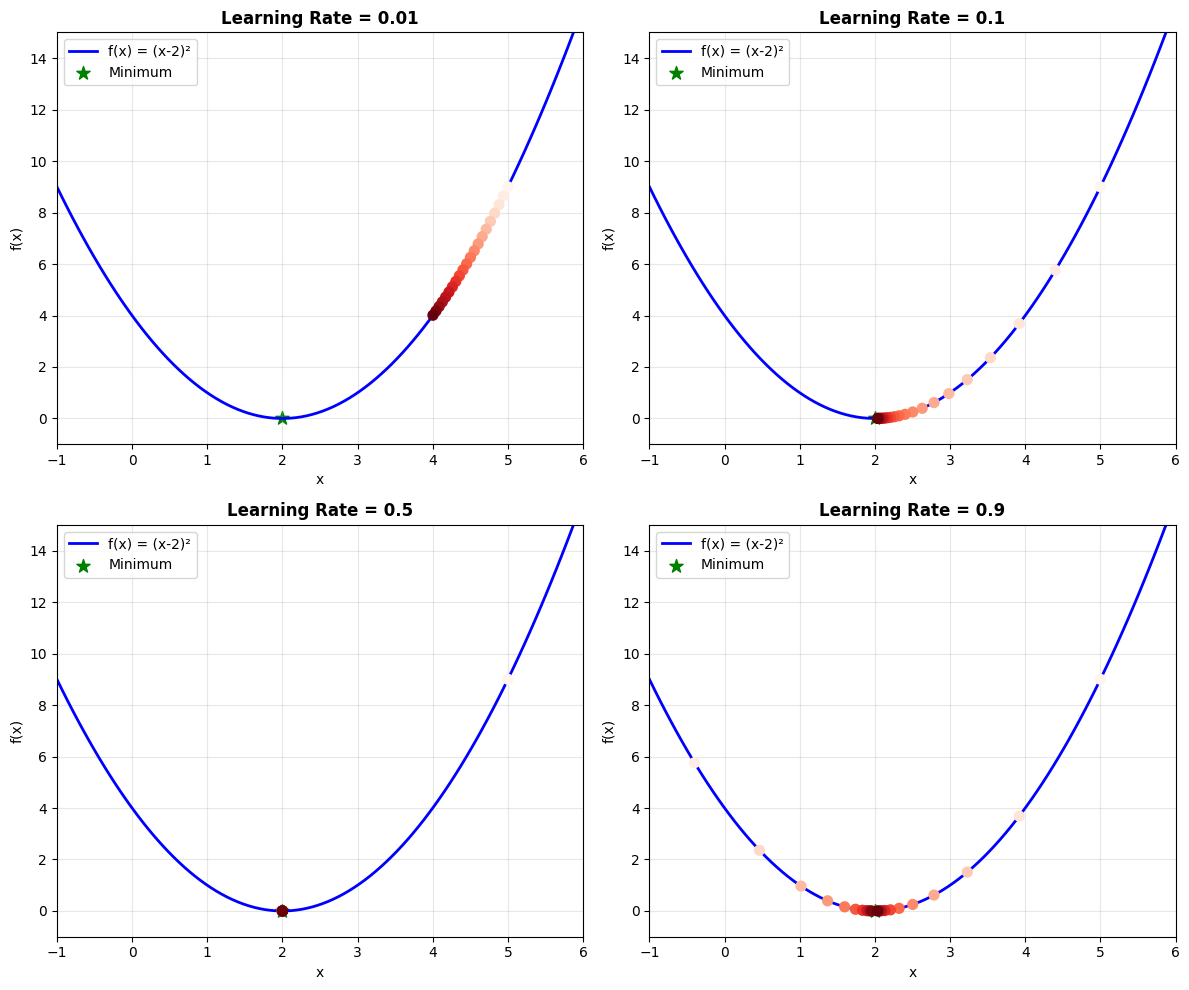


📊 LEARNING RATE EFFECTS:
• Too small (0.01): Slow convergence
• Good (0.1-0.5): Fast, stable convergence
• Too large (0.9): Oscillation/divergence


In [2]:
# Visualize gradient descent on a simple function
# f(x) = x^2 - 4x + 4 = (x-2)^2, minimum at x=2

def f(x):
    return x**2 - 4*x + 4

def grad_f(x):
    return 2*x - 4

# Different learning rates
learning_rates = [0.01, 0.1, 0.5, 0.9]
x_start = 5.0
n_steps = 20

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
x_plot = np.linspace(-1, 6, 100)

for ax, lr in zip(axes.flat, learning_rates):
    # Run gradient descent
    x_history = [x_start]
    x = x_start
    
    for _ in range(n_steps):
        x = x - lr * grad_f(x)
        x_history.append(x)
    
    # Plot
    ax.plot(x_plot, f(x_plot), 'b-', linewidth=2, label='f(x) = (x-2)²')
    ax.scatter(x_history, [f(xi) for xi in x_history], 
               c=range(len(x_history)), cmap='Reds', s=50, zorder=5)
    ax.scatter([2], [0], color='green', s=100, marker='*', label='Minimum')
    ax.set_title(f'Learning Rate = {lr}', fontweight='bold')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-1, 6)
    ax.set_ylim(-1, 15)

plt.tight_layout()
plt.show()

print("\n📊 LEARNING RATE EFFECTS:")
print("• Too small (0.01): Slow convergence")
print("• Good (0.1-0.5): Fast, stable convergence")
print("• Too large (0.9): Oscillation/divergence")

---

## Part 2: SGD with Momentum

Momentum helps accelerate SGD by accumulating gradients:
$$v_t = \gamma v_{t-1} + \eta \nabla L(\theta_t)$$
$$\theta_{t+1} = \theta_t - v_t$$

In [ ]:
# 2D optimization with momentum
# Rosenbrock-like function: f(x,y) = (1-x)^2 + 100(y-x^2)^2

def rosenbrock(params):
    x, y = params[0], params[1]
    return (1 - x)**2 + 10*(y - x**2)**2

def grad_rosenbrock(params):
    x, y = params[0], params[1]
    dx = -2*(1 - x) - 40*x*(y - x**2)
    dy = 20*(y - x**2)
    return np.array([dx, dy])

def optimize_2d(optimizer_type, lr, momentum=0, n_steps=100):
    params = np.array([-1.0, 1.0])
    history = [params.copy()]
    velocity = np.zeros(2)
    
    for _ in range(n_steps):
        grad = grad_rosenbrock(params)
        
        if optimizer_type == 'sgd':
            params = params - lr * grad
        elif optimizer_type == 'momentum':
            velocity = momentum * velocity + lr * grad
            params = params - velocity
        
        history.append(params.copy())
    
    return np.array(history)

# Compare SGD vs Momentum
sgd_path = optimize_2d('sgd', lr=0.001, n_steps=500)
momentum_path = optimize_2d('momentum', lr=0.001, momentum=0.9, n_steps=500)

# Create contour plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-0.5, 2, 100)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 10*(Y - X**2)**2

for ax, path, title in zip(axes, [sgd_path, momentum_path], ['SGD', 'SGD + Momentum']):
    ax.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
    ax.plot(path[:, 0], path[:, 1], 'r.-', markersize=3, linewidth=0.5)
    ax.scatter([1], [1], color='green', s=100, marker='*', label='Minimum')
    ax.scatter(path[0, 0], path[0, 1], color='red', s=100, marker='o', label='Start')
    ax.set_title(f'{title} (500 steps)', fontweight='bold')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()

plt.tight_layout()
plt.show()

print(f"\nFinal position - SGD: {sgd_path[-1]}")
print(f"Final position - Momentum: {momentum_path[-1]}")
print(f"\n💡 Momentum accelerates through flat regions and dampens oscillations!")

---

## Part 3: Adaptive Learning Rate Optimizers

### RMSprop
Adapts learning rate per parameter:
$$E[g^2]_t = \rho E[g^2]_{t-1} + (1-\rho) g_t^2$$
$$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_t$$

### Adam (Adaptive Moment Estimation)
Combines momentum and adaptive learning rates:
$$m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t$$
$$v_t = \beta_2 v_{t-1} + (1-\beta_2) g_t^2$$

OPTIMIZER COMPARISON ON NEURAL NETWORK


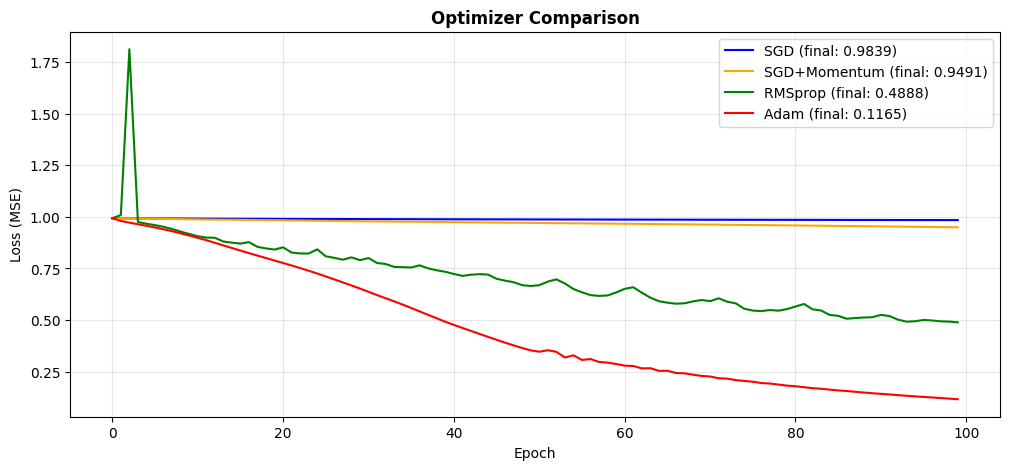


📊 OPTIMIZER SUMMARY:
------------------------------------------------------------
SGD             | Final Loss: 0.9839 | Min Loss: 0.9839
SGD+Momentum    | Final Loss: 0.9491 | Min Loss: 0.9491
RMSprop         | Final Loss: 0.4888 | Min Loss: 0.4888
Adam            | Final Loss: 0.1165 | Min Loss: 0.1165


In [3]:
# Compare optimizers on a neural network
print("OPTIMIZER COMPARISON ON NEURAL NETWORK")
print("="*60)

class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Generate synthetic data
X = torch.randn(500, 10)
y = torch.randn(500, 1)

def train_with_optimizer(optimizer_class, lr, **kwargs):
    torch.manual_seed(42)
    model = SimpleNet()
    optimizer = optimizer_class(model.parameters(), lr=lr, **kwargs)
    criterion = nn.MSELoss()
    
    losses = []
    for epoch in range(100):
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    
    return losses

# Train with different optimizers
results = {
    'SGD': train_with_optimizer(optim.SGD, lr=0.01),
    'SGD+Momentum': train_with_optimizer(optim.SGD, lr=0.01, momentum=0.9),
    'RMSprop': train_with_optimizer(optim.RMSprop, lr=0.01),
    'Adam': train_with_optimizer(optim.Adam, lr=0.01),
}

# Plot
plt.figure(figsize=(12, 5))
colors = ['blue', 'orange', 'green', 'red']

for (name, losses), color in zip(results.items(), colors):
    plt.plot(losses, label=f'{name} (final: {losses[-1]:.4f})', color=color)

plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Optimizer Comparison', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n📊 OPTIMIZER SUMMARY:")
print("-"*60)
for name, losses in results.items():
    print(f"{name:15} | Final Loss: {losses[-1]:.4f} | Min Loss: {min(losses):.4f}")

---

## Part 4: Learning Rate Schedules

Adjusting learning rate during training can improve convergence.

In [ ]:
# Learning rate schedule visualization
print("LEARNING RATE SCHEDULES")
print("="*60)

epochs = 100
initial_lr = 0.1

# Step decay
step_lrs = []
lr = initial_lr
for epoch in range(epochs):
    if epoch > 0 and epoch % 30 == 0:
        lr *= 0.1
    step_lrs.append(lr)

# Exponential decay
exp_lrs = [initial_lr * (0.95 ** epoch) for epoch in range(epochs)]

# Cosine annealing
cosine_lrs = [initial_lr * 0.5 * (1 + np.cos(np.pi * epoch / epochs)) for epoch in range(epochs)]

# Warmup + decay
warmup_epochs = 10
warmup_lrs = []
for epoch in range(epochs):
    if epoch < warmup_epochs:
        lr = initial_lr * epoch / warmup_epochs
    else:
        lr = initial_lr * 0.5 * (1 + np.cos(np.pi * (epoch - warmup_epochs) / (epochs - warmup_epochs)))
    warmup_lrs.append(lr)

# Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

schedules = [
    ('Step Decay', step_lrs, 'blue'),
    ('Exponential Decay', exp_lrs, 'orange'),
    ('Cosine Annealing', cosine_lrs, 'green'),
    ('Warmup + Cosine', warmup_lrs, 'red')
]

for ax, (name, lrs, color) in zip(axes.flat, schedules):
    ax.plot(lrs, color=color, linewidth=2)
    ax.set_title(name, fontweight='bold')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Learning Rate')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 WHEN TO USE EACH SCHEDULE:")
print("• Step Decay: Simple, predictable drops")
print("• Exponential: Smooth, continuous decay")
print("• Cosine: Popular in modern DNNs, smooth curve")
print("• Warmup: Helps with large batches, stabilizes training")

---

## Part 5: PyTorch Learning Rate Schedulers

In [ ]:
# PyTorch scheduler demonstration
print("PYTORCH LR SCHEDULERS")
print("="*60)

def demo_scheduler(scheduler_class, **kwargs):
    model = SimpleNet()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    scheduler = scheduler_class(optimizer, **kwargs)
    
    lrs = []
    for epoch in range(100):
        lrs.append(optimizer.param_groups[0]['lr'])
        scheduler.step()
    
    return lrs

# Different schedulers
schedulers = {
    'StepLR': demo_scheduler(optim.lr_scheduler.StepLR, step_size=30, gamma=0.1),
    'ExponentialLR': demo_scheduler(optim.lr_scheduler.ExponentialLR, gamma=0.95),
    'CosineAnnealingLR': demo_scheduler(optim.lr_scheduler.CosineAnnealingLR, T_max=100),
}

# Plot
plt.figure(figsize=(10, 5))
colors = ['blue', 'orange', 'green']

for (name, lrs), color in zip(schedulers.items(), colors):
    plt.plot(lrs, label=name, color=color, linewidth=2)

plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('PyTorch LR Schedulers', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n📝 USAGE PATTERN:")
print("""
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)

for epoch in range(100):
    train(...)  # Training step
    scheduler.step()  # Update learning rate
""")

---

## Part 6: Trading Model Optimizer Selection

In [ ]:
# Practical example: Stock price predictor with different optimizers
print("TRADING MODEL: OPTIMIZER COMPARISON")
print("="*60)

class StockPredictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(20, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.network(x)

# Generate synthetic stock data
np.random.seed(42)
n_samples = 1000

# Features: lag returns, volatility, volume, etc.
X_train = torch.randn(n_samples, 20)
# Target: next day return (small values around 0)
y_train = 0.02 * torch.randn(n_samples, 1)  # ~2% daily returns

def train_trading_model(optimizer_name, epochs=100):
    torch.manual_seed(42)
    model = StockPredictor()
    
    if optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=0.01)
    elif optimizer_name == 'SGD+Momentum':
        optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=0.001)
    elif optimizer_name == 'AdamW':
        optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
    
    criterion = nn.MSELoss()
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10)
    
    losses = []
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
        scheduler.step(loss)
        losses.append(loss.item())
    
    # Calculate direction accuracy
    model.eval()
    with torch.no_grad():
        preds = model(X_train)
        direction_acc = ((preds > 0) == (y_train > 0)).float().mean().item()
    
    return losses, direction_acc

# Compare
results = {}
for opt_name in ['SGD', 'SGD+Momentum', 'Adam', 'AdamW']:
    losses, acc = train_trading_model(opt_name)
    results[opt_name] = {'losses': losses, 'direction_acc': acc}

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = ['blue', 'orange', 'green', 'red']
for (name, data), color in zip(results.items(), colors):
    axes[0].plot(data['losses'], label=f"{name} (final: {data['losses'][-1]:.6f})", color=color)

axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MSE Loss')
axes[0].set_title('Training Loss', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Direction accuracy
opt_names = list(results.keys())
accs = [results[name]['direction_acc'] for name in opt_names]
bars = axes[1].bar(opt_names, accs, color=colors)
axes[1].axhline(y=0.5, color='gray', linestyle='--', label='Random guess')
axes[1].set_ylabel('Direction Accuracy')
axes[1].set_title('Direction Prediction Accuracy', fontweight='bold')
axes[1].legend()
axes[1].set_ylim(0, 1)
axes[1].grid(True, alpha=0.3, axis='y')

for bar, acc in zip(bars, accs):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                 f'{acc:.1%}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n📊 TRADING MODEL RECOMMENDATIONS:")
print("="*60)
print("• AdamW: Best for most cases (weight decay helps regularization)")
print("• Adam: Good default, fast convergence")
print("• SGD+Momentum: Can generalize better with proper tuning")
print("• Use ReduceLROnPlateau: Adapts when loss plateaus")

---

## 📝 Day 4 Summary

### Key Optimizers:

| Optimizer | Formula | Best For |
|-----------|---------|----------|
| SGD | $\theta = \theta - \eta \nabla L$ | Simple baselines |
| Momentum | Accumulates gradients | Faster convergence |
| RMSprop | Adaptive per-param LR | Noisy gradients |
| Adam | Momentum + RMSprop | Default choice |
| AdamW | Adam + weight decay | Modern best practice |

### LR Schedule Guidelines:
- Start with **warmup** for large models/batches
- Use **cosine annealing** for smooth decay
- **ReduceLROnPlateau** for automatic adjustment

In [4]:
print("""
╔══════════════════════════════════════════════════════════════════╗
║            DAY 4 COMPLETE: OPTIMIZERS & LR SCHEDULES             ║
╠══════════════════════════════════════════════════════════════════╣
║  ✓ Gradient descent visualization                               ║
║  ✓ SGD with momentum                                            ║
║  ✓ Adaptive optimizers (RMSprop, Adam)                          ║
║  ✓ Learning rate schedules                                      ║
║  ✓ Trading model optimizer comparison                           ║
╚══════════════════════════════════════════════════════════════════╝
""")


╔══════════════════════════════════════════════════════════════════╗
║            DAY 4 COMPLETE: OPTIMIZERS & LR SCHEDULES             ║
╠══════════════════════════════════════════════════════════════════╣
║  ✓ Gradient descent visualization                               ║
║  ✓ SGD with momentum                                            ║
║  ✓ Adaptive optimizers (RMSprop, Adam)                          ║
║  ✓ Learning rate schedules                                      ║
║  ✓ Trading model optimizer comparison                           ║
╚══════════════════════════════════════════════════════════════════╝

